# every-eye

## clustering

<br>

#### 활용 데이터셋 
##### 1. everyone
##### 2. MPIIGaze

<br>

#### Crop Rect
##### 1. (60 x 38)

# imports

In [16]:
import sys
import glob
import cv2 
import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

RANDOM_SEED = 860515
%matplotlib inline

sys.path.append("../../../")
%run ../../../ac/visualizer/plotter.py
%run ../../../ds/everyone/npz/gen.py
%run ../../../ds/unity/npz/gen.py
%run ../../../ac/common/images.py
%run ../../../ac/images/filters/filters.py

# resource

In [2]:
unity_path = "/home/chy/archive-data/processed/unity-npz"
npz_path = "/home/chy/archive-data/processed/everyone-npz"
every_eye_path = "/home/chy/archive-data/samples/every-eye"

# generator

In [3]:
# egen = EveryoneGenerator(npz_path)
# ugen = UnityGenerator(unity_path)
img_paths = glob.glob("{}/00130/l-*.jpg".format(every_eye_path))

In [5]:
X, y = [], []
for img_path in img_paths:
    eye_img = cv2.imread(img_path)
    eye_img = eye_img.flatten()
    fid = int(img_path.rpartition('l-')[2].rpartition('.jpg')[0])
    X.append(eye_img)
    y.append(fid)

X = np.array(X)
y = np.array(y)

# visualize samples

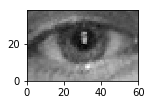

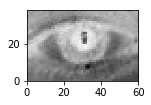

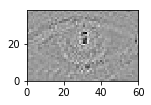

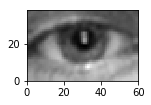

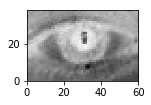

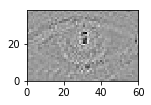

In [28]:
img = cv2.imread(img_paths[5])
img = bgr_to_rgb(img)
img = color_to_grey(img)

show_image(img, fig_size=(2,2))
show_image(invert_color(img), fig_size=(2,2))
show_image(apply_laplacian(img), fig_size=(2,2))

show_image(gaussian_blur(img), fig_size=(2,2))
show_image(invert_color(img), fig_size=(2,2))
show_image(apply_laplacian(img), fig_size=(2,2))

# visualize dist

In [5]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", len(colors)))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    for i in range(len(colors)):
        img = x[colors== i]
        img = img.reshape((38, 60, 3))
        ax.imshow(img)

    return f, ax, sc

# prepare

In [6]:
eye_proj = TSNE(random_state=RANDOM_SEED).fit_transform(X)

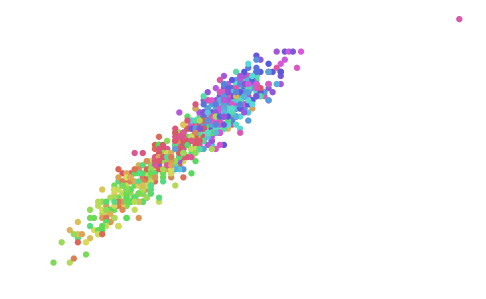

In [7]:
f, ax, sc = scatter(X, y)